In [1]:
# Import SQL Alchemy
import pandas as pd
from sqlalchemy import create_engine
import config as cfg
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt


In [2]:
# Import and establish Base for which classes will be constructed 
from sqlalchemy.ext.declarative import declarative_base
Base = declarative_base()

In [3]:
postgres_str = ('postgresql://{user}:{password}@{host}:{port}/{database}'.format(user=cfg.mysql['user'], 
       password= cfg.mysql['password'], 
       host=cfg.mysql['host'], 
       port=cfg.mysql['port'], 
       database=cfg.mysql['database'])) 
# Create the connection 
connection = create_engine(postgres_str)


In [4]:
#queryimg db for department info
df_departmets = pd.read_sql('select * from departments', con = connection)
df_departmets.head()

,dept_no,dept_name
0,d001,Marketing
1,d002,Finance
2,d003,Human Resources
3,d004,Production
4,d005,Development


In [5]:
#Querying DB for employee basic info

df_employee = pd.read_sql('SELECT * FROM employee',con = connection )
df_employee.head(10)

,emp_no,birth_date,first_name,last_name,gender,hire_date
0,10001,1953-09-02,Georgi,Facello,M,1986-06-26
1,10002,1964-06-02,Bezalel,Simmel,F,1985-11-21
2,10003,1959-12-03,Parto,Bamford,M,1986-08-28
3,10004,1954-05-01,Chirstian,Koblick,M,1986-12-01
4,10005,1955-01-21,Kyoichi,Maliniak,M,1989-09-12
5,10006,1953-04-20,Anneke,Preusig,F,1989-06-02
6,10007,1957-05-23,Tzvetan,Zielinski,F,1989-02-10
7,10008,1958-02-19,Saniya,Kalloufi,M,1994-09-15
8,10009,1952-04-19,Sumant,Peac,F,1985-02-18
9,10010,1963-06-01,Duangkaew,Piveteau,F,1989-08-24


In [6]:
# Querying databse for manager departmets info

df_dept_manger = pd.read_sql('SELECT * FROM dept_manager', con = connection)
df_dept_manger.head(10)

,dept_no,emp_no,from_date,to_date
0,d001,110022,1985-01-01,1991-10-01
1,d001,110039,1991-10-01,9999-01-01
2,d002,110085,1985-01-01,1989-12-17
3,d002,110114,1989-12-17,9999-01-01
4,d003,110183,1985-01-01,1992-03-21
5,d003,110228,1992-03-21,9999-01-01
6,d004,110303,1985-01-01,1988-09-09
7,d004,110344,1988-09-09,1992-08-02
8,d004,110386,1992-08-02,1996-08-30
9,d004,110420,1996-08-30,9999-01-01


In [7]:
#Querying database for employee departmets 
df_emp_dept = pd.read_sql('SELECT * FROM emp_dept' , con = connection)
df_emp_dept.head(10)

,emp_no,dept_no,from_date,to_date
0,10001,d005,1986-06-26,9999-01-01
1,10002,d007,1996-08-03,9999-01-01
2,10003,d004,1995-12-03,9999-01-01
3,10004,d004,1986-12-01,9999-01-01
4,10005,d003,1989-09-12,9999-01-01
5,10006,d005,1990-08-05,9999-01-01
6,10007,d008,1989-02-10,9999-01-01
7,10008,d005,1998-03-11,2000-07-31
8,10009,d006,1985-02-18,9999-01-01
9,10010,d004,1996-11-24,2000-06-26


In [8]:
# Querying database for titles
df_title = pd. read_sql('SELECT * FROM titles', con = connection)
df_title.head(10)

,emp_no,title,from_date,to_date
0,10001,Senior Engineer,1986-06-26,9999-01-01
1,10002,Staff,1996-08-03,9999-01-01
2,10003,Senior Engineer,1995-12-03,9999-01-01
3,10004,Engineer,1986-12-01,1995-12-01
4,10004,Senior Engineer,1995-12-01,9999-01-01
5,10005,Senior Staff,1996-09-12,9999-01-01
6,10005,Staff,1989-09-12,1996-09-12
7,10006,Senior Engineer,1990-08-05,9999-01-01
8,10007,Senior Staff,1996-02-11,9999-01-01
9,10007,Staff,1989-02-10,1996-02-11


In [9]:
# Querying database for salary info
df_salary = pd.read_sql('SELECT * FROM salaries', con = connection)
df_salary.head(10)

,emp_no,salary,from_date,to_date
0,10001,60117,1986-06-26,1987-06-26
1,10002,65828,1996-08-03,1997-08-03
2,10003,40006,1995-12-03,1996-12-02
3,10004,40054,1986-12-01,1987-12-01
4,10005,78228,1989-09-12,1990-09-12
5,10006,40000,1990-08-05,1991-08-05
6,10007,56724,1989-02-10,1990-02-10
7,10008,46671,1998-03-11,1999-03-11
8,10009,60929,1985-02-18,1986-02-18
9,10010,72488,1996-11-24,1997-11-24


In [11]:
salaries_titles = pd.merge(df_title, df_salary, on=["emp_no", "from_date"], how="inner")
salaries_titles

,emp_no,title,from_date,to_date_x,salary,to_date_y
0,10001,Senior Engineer,1986-06-26,9999-01-01,60117,1987-06-26
1,10002,Staff,1996-08-03,9999-01-01,65828,1997-08-03
2,10003,Senior Engineer,1995-12-03,9999-01-01,40006,1996-12-02
3,10004,Engineer,1986-12-01,1995-12-01,40054,1987-12-01
4,10005,Staff,1989-09-12,1996-09-12,78228,1990-09-12
5,10006,Senior Engineer,1990-08-05,9999-01-01,40000,1991-08-05
6,10007,Staff,1989-02-10,1996-02-11,56724,1990-02-10
7,10008,Assistant Engineer,1998-03-11,2000-07-31,46671,1999-03-11
8,10009,Assistant Engineer,1985-02-18,1990-02-18,60929,1986-02-18
9,10010,Engineer,1996-11-24,9999-01-01,72488,1997-11-24


In [14]:
result_grpby = salaries_titles.groupby('title') 
avgsalary = round(result_grpby['salary'].mean().reset_index(name='Average Salary'),2)
avgsalary.head(10)

,title,Average Salary
0,Assistant Engineer,48493.20
1,Engineer,48547.81
2,Manager,57290.78
3,Senior Engineer,48425.34
4,Senior Staff,58547.69
5,Staff,58465.50
6,Technique Leader,48580.98


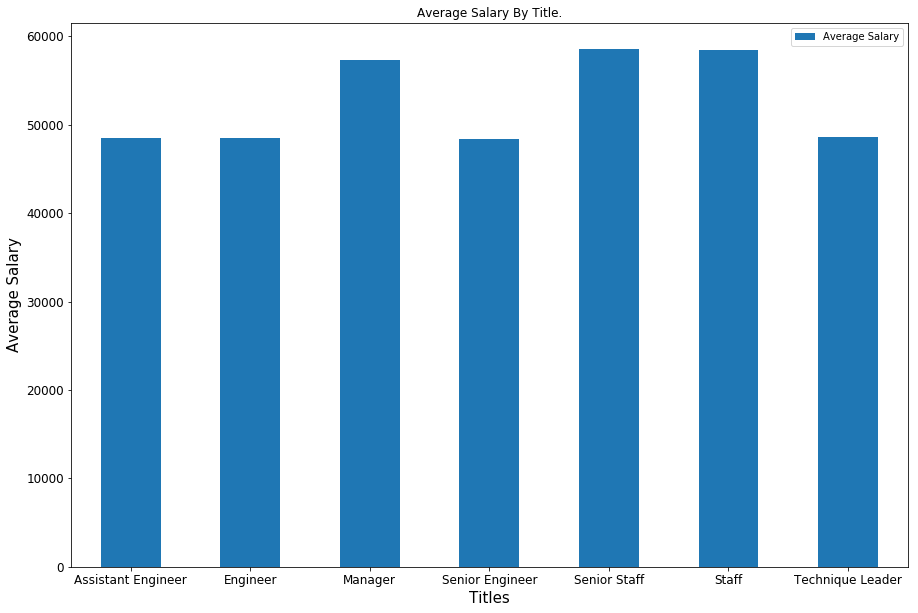

In [13]:

objects = avgsalary['title']
y_pos = np.arange(len(objects))
ax = avgsalary.plot(kind='bar', title ="Average Salary for Titles",figsize=(15,10),legend=True, fontsize=12)
y_pos = np.arange(len(objects))
ax.set_xlabel("Titles", fontsize=15)
ax.set_ylabel("Average Salary", fontsize=15)
plt.xticks(y_pos,objects , rotation=360)
plt.ylabel('Average Salary')
plt.title('Average Salary By Title.')

plt.show()
